In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
import pickle

Load Dataset

In [6]:
old_dataset = pd.read_csv('test.csv')
print(old_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1724 non-null   int64  
 1   FoodGroup         1724 non-null   object 
 2   Descrip           1724 non-null   object 
 3   Energy_kcal       1724 non-null   float64
 4   Protein_g         1724 non-null   float64
 5   Fat_g             1724 non-null   float64
 6   Carb_g            1724 non-null   float64
 7   Sugar_g           1724 non-null   float64
 8   Fiber_g           1724 non-null   float64
 9   VitA_mcg          1724 non-null   float64
 10  VitB6_mg          1724 non-null   float64
 11  VitB12_mcg        1724 non-null   float64
 12  VitC_mg           1724 non-null   float64
 13  VitE_mg           1724 non-null   float64
 14  Folate_mcg        1724 non-null   float64
 15  Niacin_mg         1724 non-null   float64
 16  Riboflavin_mg     1724 non-null   float64


In [7]:
new_dataset = pd.read_csv('test2.csv')
print(new_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7058 non-null   int64  
 1   Description   7058 non-null   object 
 2   Calories      7057 non-null   float64
 3   Protein       7057 non-null   float64
 4   TotalFat      7057 non-null   float64
 5   Carbohydrate  7057 non-null   float64
 6   Sodium        6974 non-null   float64
 7   SaturatedFat  6757 non-null   float64
 8   Cholesterol   6770 non-null   float64
 9   Sugar         5148 non-null   float64
 10  Calcium       6922 non-null   float64
 11  Iron          6935 non-null   float64
 12  Potassium     6649 non-null   float64
 13  VitaminC      6726 non-null   float64
 14  VitaminE      4338 non-null   float64
 15  VitaminD      4224 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 882.4+ KB
None


Normalisasi Nama Kolom

In [9]:
new_dataset.rename(columns={
    'Calories': 'Energy_kcal',
    'TotalFat': 'Fat_g',
    'Carbohydrate': 'Carb_g',
    'VitaminC': 'VitC_mg',
    'VitaminE': 'VitE_mg',
    'Sugar': 'Sugar_g',
    'Calcium': 'Calcium_mg',
    'Iron': 'Iron_mg'
}, inplace=True)

In [11]:
# Penambahan kolom yang tidak ada pada daaset baru
missing_cols = set(old_dataset.columns) - set(new_dataset.columns)
for col in missing_cols:
    new_dataset[col] = np.nan

In [12]:
# menangani nul value
numeric_cols = new_dataset.select_dtypes(include=['float64']).columns
new_dataset[numeric_cols] = new_dataset[numeric_cols].fillna(new_dataset[numeric_cols].mean())

Penggabungan dataset

In [14]:
combined_dataset = pd.concat([old_dataset, new_dataset], ignore_index=True)

In [36]:
print(combined_dataset.shape)

(8782, 50)


Simpan Penggabungan dataset

In [37]:
output_file = "combined_nutrition_dataset.csv"
combined_dataset.to_csv(output_file, index=False)

print(f"Dataset gabungan berhasil disimpan ke file '{output_file}'")


Dataset gabungan berhasil disimpan ke file 'combined_nutrition_dataset.csv'


Normalisasi Skala

In [15]:
scaler = StandardScaler()
numeric_cols = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 
                'Calcium_mg', 'Iron_mg', 'VitC_mg', 'VitE_mg']
combined_dataset[numeric_cols] = scaler.fit_transform(combined_dataset[numeric_cols])

Encode Label

In [16]:
label_encoder = LabelEncoder()
combined_dataset['FoodGroup_Encoded'] = label_encoder.fit_transform(combined_dataset['FoodGroup'])

Split Dataset

In [20]:
X = combined_dataset[['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 
                      'Calcium_mg', 'Iron_mg', 'VitC_mg', 'VitE_mg']]
y = combined_dataset['FoodGroup_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

Pembuatan Model dengan Decision Tree

In [22]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9117814456459875
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.29      0.27        14
           1       0.50      0.33      0.40         9
           2       0.76      0.76      0.76        25
           3       0.81      0.76      0.79        51
           4       0.64      0.50      0.56        14
           5       0.73      0.69      0.71        16
           6       0.70      0.58      0.64        12
           7       0.62      0.62      0.62        13
           8       0.50      0.55      0.52        11
           9       0.78      0.58      0.67        12
          10       0.67      0.75      0.71         8
          11       0.38      0.38      0.38         8
          12       0.28      0.35      0.31        20
          13       0.46      0.50      0.48        12
          14       0.40      0.33      0.36         6
          15       0.20      0.20      0.20         5
          16       0.53     

Eksport Model dengan pickle

In [23]:
with open('food_group_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model berhasil disimpan ke 'food_group_model.pkl'")

Model berhasil disimpan ke 'food_group_model.pkl'


Fungsi Tambahan

In [30]:
def analyze_nutritional_content(food_item):
    """
    Menganalisis kandungan gizi dari makanan tertentu.
    """
    # Filter data berdasarkan nama makanan
    food_data = combined_dataset[combined_dataset['Descrip'] == food_item]
    if food_data.empty:
        print(f"{food_item} tidak ditemukan dalam dataset.")
        return

    # Ekstraksi data nutrisi
    nutrition_features = ['Protein_g', 'Fat_g', 'Carb_g']
    vitamin_features = ['VitC_mg', 'VitE_mg']
    mineral_features = ['Calcium_mg', 'Iron_mg']
    
    nutrition_info = food_data[nutrition_features].iloc[0]
    vitamin_info = food_data[vitamin_features].iloc[0]
    mineral_info = food_data[mineral_features].iloc[0]

    # Tampilkan informasi nutrisi
    print(f"Analisis Nutrisi untuk: {food_item}\n")
    print("Makronutrien:")
    display(nutrition_info)
    print("\nVitamin:")
    display(vitamin_info)
    print("\nMineral:")
    display(mineral_info)

    # Visualisasi
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 5))

    # Plot makronutrien
    plt.subplot(1, 3, 1)
    nutrition_info.plot(kind='bar', color='skyblue')
    plt.title('Makronutrien')
    plt.xlabel('Nutrisi')
    plt.ylabel('Jumlah (gram)')

    # Plot vitamin
    plt.subplot(1, 3, 2)
    vitamin_info.plot(kind='bar', color='orange')
    plt.title('Vitamin')
    plt.xticks(rotation=45)

    # Plot mineral
    plt.subplot(1, 3, 3)
    mineral_info.plot(kind='bar', color='green')
    plt.title('Mineral')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


def calculate_bmi_and_needs(weight, height, age, gender, activity_level):
    """
    Menghitung BMI dan kebutuhan nutrisi.
    """
    # Hitung BMI
    height_m = height / 100
    bmi = weight / (height_m ** 2)

    # Tentukan kategori BMI
    if bmi < 18.5:
        bmi_category = 'Underweight'
    elif 18.5 <= bmi < 25:
        bmi_category = 'Normal'
    elif 25 <= bmi < 30:
        bmi_category = 'Overweight'
    else:
        bmi_category = 'Obese'

    # Hitung BMR (Basal Metabolic Rate)
    if gender.lower() == 'm':
        bmr = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        bmr = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)

    # Faktor aktivitas
    activity_factors = {
        'Tidak banyak bergerak': 1.2,
        'Ringan': 1.375,
        'Sedang': 1.55,
        'Aktif': 1.725,
        'Sangat aktif': 1.9
    }
    daily_calories = bmr * activity_factors[activity_level]

    # Hitung kebutuhan nutrisi
    protein_needs = weight * 0.8  # 0.8g per kg berat badan
    fat_needs = (daily_calories * 0.25) / 9  # 25% dari kalori untuk lemak
    carb_needs = (daily_calories * 0.55) / 4  # 55% dari kalori untuk karbohidrat

    results = {
        'BMI': round(bmi, 2),
        'Category': bmi_category,
        'Daily Calories': round(daily_calories),
        'Protein Needs (g)': round(protein_needs),
        'Fat Needs (g)': round(fat_needs),
        'Carb Needs (g)': round(carb_needs)
    }

    return pd.Series(results)


def get_food_recommendations(bmi_category, daily_calories, restrictions=None):
    """
    Memberikan rekomendasi makanan berdasarkan BMI dan kalori.
    """
    filtered_df = combined_dataset.copy()

    # Filter berdasarkan restriksi makanan
    if restrictions:
        for restriction in restrictions:
            filtered_df = filtered_df[~filtered_df['FoodGroup'].str.contains(restriction, na=False)]

    # Skor rekomendasi berdasarkan kategori BMI
    if bmi_category == 'Underweight':
        filtered_df['score'] = (
            filtered_df['Energy_kcal'] / 500 +
            filtered_df['Protein_g'] / 20
        )
    elif bmi_category in ['Overweight', 'Obese']:
        filtered_df['score'] = (
            filtered_df['Protein_g'] / 20 +
            filtered_df['Fiber_g'] / 10 -
            filtered_df['Energy_kcal'] / 1000
        )
    else:
        filtered_df['score'] = (
            filtered_df['Protein_g'] / 20 +
            filtered_df['Fiber_g'] / 10 +
            filtered_df['VitC_mg'] / 60 +
            filtered_df['Calcium_mg'] / 1000
        ) / 4

    # Ambil 5 makanan terbaik berdasarkan skor
    recommendations = filtered_df.nlargest(5, 'score')
    return recommendations[['Descrip', 'FoodGroup', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Fiber_g']]

Pengujian

Analisis Nutrisi untuk: Beef, chuck, under blade steak, boneless, separable lean and fat, trimmed to 0" fat, all grades, cooked, braised

Makronutrien:


Protein_g    1.551326
Fat_g        0.459729
Carb_g      -0.757078
Name: 0, dtype: float64


Vitamin:


VitC_mg   -0.129087
VitE_mg   -0.314079
Name: 0, dtype: float64


Mineral:


Calcium_mg   -0.279126
Iron_mg       0.001760
Name: 0, dtype: float64

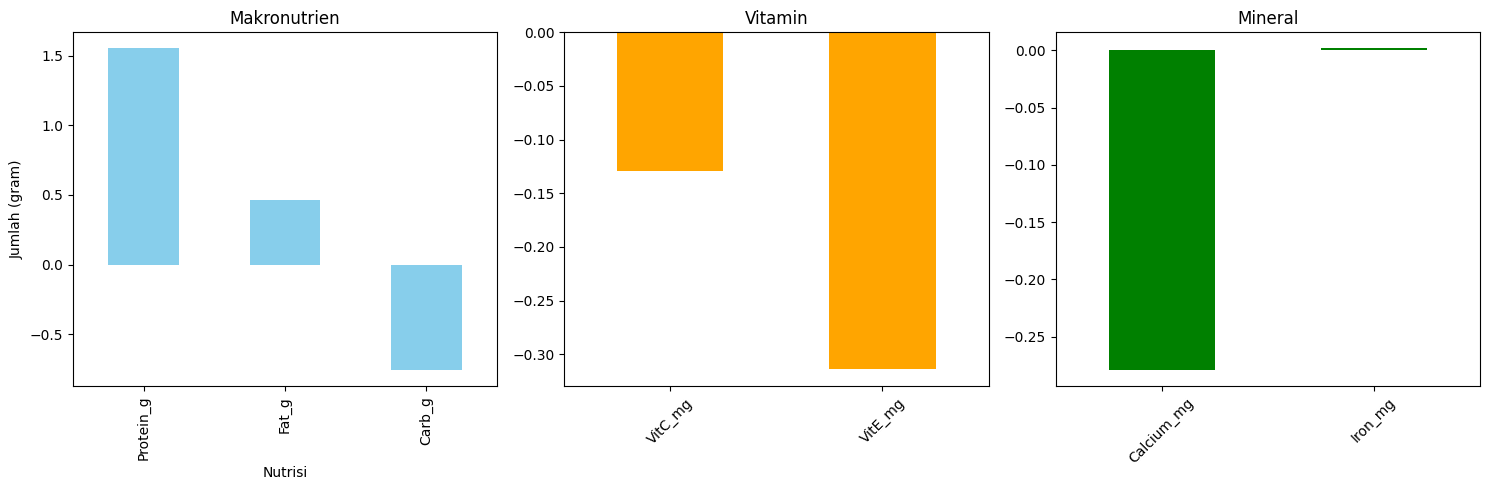

User Stats:


BMI                   20.76
Category             Normal
Daily Calories         1845
Protein Needs (g)        48
Fat Needs (g)            51
Carb Needs (g)          254
dtype: object

Rekomendasi Makanan:


,Descrip,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Fiber_g
1266,"Cereals ready-to-eat, GENERAL MILLS, FIBER ONE...",Breakfast Cereals,-0.145176,-0.452335,-0.493219,2.321037,47.5
202,"Pinon Nuts, roasted (Navajo)",American Indian/Alaska Native Foods,1.902001,-0.385360,1.429565,1.100926,43.4
1461,"Spices, oregano, dried",Spices and Herbs,0.245048,-0.237457,-0.367768,1.750827,42.5
616,"Spices, coriander seed",Spices and Herbs,0.443162,0.076022,0.445857,1.243933,41.9
605,"Spices, marjoram, dried",Spices and Herbs,0.281069,0.102997,-0.201303,1.446618,40.3


In [32]:
food_item = combined_dataset['Descrip'].iloc[0]  # Ambil makanan pertama sebagai contoh
analyze_nutritional_content(food_item)

user_stats = calculate_bmi_and_needs(
    weight=60,  # kg
    height=170,  # cm
    age=30,
    gender='M',
    activity_level='Tidak banyak bergerak'
)
print("User Stats:")
display(user_stats)

# Dapatkan rekomendasi makanan
recommendations = get_food_recommendations(
    bmi_category=user_stats['Category'],
    daily_calories=user_stats['Daily Calories'],
    restrictions=['Dairy']  # contoh restriksi
)
print("Rekomendasi Makanan:")
display(recommendations)